In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Upload file and make a copy of the file
countries_df = pd.read_csv('Countries Data.csv')
df = countries_df
df.head(3)

,country,year,population,continent,life_exp,gdp_cap
0,NaN,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710


In [3]:
# Extract the rows where the year is 1952
c_52 = df.loc[df['year'] == 1952]
c_52.head()

,country,year,population,continent,life_exp,gdp_cap
0,NaN,1952,8425333,Asia,28.801,779.445314
12,Albania,1952,1282697,Europe,55.230,1601.056136
24,Algeria,1952,9279525,Africa,43.077,2449.008185
36,Angola,1952,4232095,Africa,30.015,3520.610273
48,Argentina,1952,17876956,Americas,62.485,5911.315053


In [4]:
# Extract the rows where the yer is 2007
c_07 = df.loc[df['year'] == 2007]
c_07.head()

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640


In [5]:
type(c_52)

pandas.core.frame.DataFrame

In [6]:
# Merge the '52 and '07 dataframes together
c_merge = pd.merge(c_52, c_07, left_on='country', right_on='country')
c_merge.head()

,country,year_x,population_x,continent_x,life_exp_x,gdp_cap_x,year_y,population_y,continent_y,life_exp_y,gdp_cap_y
0,Albania,1952,1282697,Europe,55.230,1601.056136,2007,3600523,Europe,76.423,5937.029526
1,Algeria,1952,9279525,Africa,43.077,2449.008185,2007,33333216,Africa,72.301,6223.367465
2,Angola,1952,4232095,Africa,30.015,3520.610273,2007,12420476,Africa,42.731,4797.231267
3,Argentina,1952,17876956,Americas,62.485,5911.315053,2007,40301927,Americas,75.320,12779.379640
4,Australia,1952,8691212,Oceania,69.120,10039.595640,2007,20434176,Oceania,81.235,34435.367440


In [7]:
# Drop both the year columns
c_merge.drop(['year_x', 'year_y'], axis = 1)
c_merge.head()

,country,year_x,population_x,continent_x,life_exp_x,gdp_cap_x,year_y,population_y,continent_y,life_exp_y,gdp_cap_y
0,Albania,1952,1282697,Europe,55.230,1601.056136,2007,3600523,Europe,76.423,5937.029526
1,Algeria,1952,9279525,Africa,43.077,2449.008185,2007,33333216,Africa,72.301,6223.367465
2,Angola,1952,4232095,Africa,30.015,3520.610273,2007,12420476,Africa,42.731,4797.231267
3,Argentina,1952,17876956,Americas,62.485,5911.315053,2007,40301927,Americas,75.320,12779.379640
4,Australia,1952,8691212,Oceania,69.120,10039.595640,2007,20434176,Oceania,81.235,34435.367440


In [8]:
# Create a new column that takes the differences between the population_y and the population_x column
c_merge['population_growth'] = c_merge['population_y'] - c_merge['population_x']
c_merge.head()

,country,year_x,population_x,continent_x,life_exp_x,gdp_cap_x,year_y,population_y,continent_y,life_exp_y,gdp_cap_y,population_growth
0,Albania,1952,1282697,Europe,55.230,1601.056136,2007,3600523,Europe,76.423,5937.029526,2317826
1,Algeria,1952,9279525,Africa,43.077,2449.008185,2007,33333216,Africa,72.301,6223.367465,24053691
2,Angola,1952,4232095,Africa,30.015,3520.610273,2007,12420476,Africa,42.731,4797.231267,8188381
3,Argentina,1952,17876956,Americas,62.485,5911.315053,2007,40301927,Americas,75.320,12779.379640,22424971
4,Australia,1952,8691212,Oceania,69.120,10039.595640,2007,20434176,Oceania,81.235,34435.367440,11742964


In [9]:
c_merge.shape, type(c_merge)

((141, 12), pandas.core.frame.DataFrame)

In [10]:
# Sort the values so you get back the 10 countries with the biggest population growth
c_merge = c_merge.sort_values('population_growth', ascending=False).head(10)

In [11]:
c_merge.head(10)

,country,year_x,population_x,continent_x,life_exp_x,gdp_cap_x,year_y,population_y,continent_y,life_exp_y,gdp_cap_y,population_growth
23,China,1952,556263527,Asia,44.000,400.448611,2007,1318683096,Asia,72.961,4959.114854,762419569
57,India,1952,372000000,Asia,37.373,546.565749,2007,1110396331,Asia,64.698,2452.210407,738396331
133,United States,1952,157553000,Americas,68.440,13990.482080,2007,301139947,Americas,78.242,42951.653090,143586947
58,Indonesia,1952,82052000,Asia,37.468,749.681655,2007,223547000,Asia,70.650,3540.651564,141495000
13,Brazil,1952,56602560,Americas,50.917,2108.944355,2007,190010647,Americas,72.390,9065.800825,133408087
96,Pakistan,1952,41346560,Asia,43.436,684.597144,2007,169270617,Asia,65.483,2605.947580,127924057
7,Bangladesh,1952,46886859,Asia,37.484,684.244172,2007,150448339,Asia,64.062,1391.253792,103561480
93,Nigeria,1952,33119096,Africa,36.324,1077.281856,2007,135031164,Africa,46.859,2013.977305,101912068
81,Mexico,1952,30144317,Americas,50.789,3478.125529,2007,108700891,Americas,76.195,11977.574960,78556574
100,Philippines,1952,22438691,Asia,47.752,1272.880995,2007,91077287,Asia,71.688,3190.481016,68638596


In [12]:
# Reset the index
c_merge = c_merge.reset_index()
c_merge.head(10)

,index,country,year_x,population_x,continent_x,life_exp_x,gdp_cap_x,year_y,population_y,continent_y,life_exp_y,gdp_cap_y,population_growth
0,23,China,1952,556263527,Asia,44.000,400.448611,2007,1318683096,Asia,72.961,4959.114854,762419569
1,57,India,1952,372000000,Asia,37.373,546.565749,2007,1110396331,Asia,64.698,2452.210407,738396331
2,133,United States,1952,157553000,Americas,68.440,13990.482080,2007,301139947,Americas,78.242,42951.653090,143586947
3,58,Indonesia,1952,82052000,Asia,37.468,749.681655,2007,223547000,Asia,70.650,3540.651564,141495000
4,13,Brazil,1952,56602560,Americas,50.917,2108.944355,2007,190010647,Americas,72.390,9065.800825,133408087
5,96,Pakistan,1952,41346560,Asia,43.436,684.597144,2007,169270617,Asia,65.483,2605.947580,127924057
6,7,Bangladesh,1952,46886859,Asia,37.484,684.244172,2007,150448339,Asia,64.062,1391.253792,103561480
7,93,Nigeria,1952,33119096,Africa,36.324,1077.281856,2007,135031164,Africa,46.859,2013.977305,101912068
8,81,Mexico,1952,30144317,Americas,50.789,3478.125529,2007,108700891,Americas,76.195,11977.574960,78556574
9,100,Philippines,1952,22438691,Asia,47.752,1272.880995,2007,91077287,Asia,71.688,3190.481016,68638596


In [13]:
c_merge.shape

(10, 13)

In [14]:
# Drop the index column
c_merge = c_merge.drop(['index'], axis = 1)

In [15]:
c_merge.shape

(10, 12)

In [16]:
# We have our top ten countries with the highest population from the years between 1952 and 2007!
c_merge

,country,year_x,population_x,continent_x,life_exp_x,gdp_cap_x,year_y,population_y,continent_y,life_exp_y,gdp_cap_y,population_growth
0,China,1952,556263527,Asia,44.000,400.448611,2007,1318683096,Asia,72.961,4959.114854,762419569
1,India,1952,372000000,Asia,37.373,546.565749,2007,1110396331,Asia,64.698,2452.210407,738396331
2,United States,1952,157553000,Americas,68.440,13990.482080,2007,301139947,Americas,78.242,42951.653090,143586947
3,Indonesia,1952,82052000,Asia,37.468,749.681655,2007,223547000,Asia,70.650,3540.651564,141495000
4,Brazil,1952,56602560,Americas,50.917,2108.944355,2007,190010647,Americas,72.390,9065.800825,133408087
5,Pakistan,1952,41346560,Asia,43.436,684.597144,2007,169270617,Asia,65.483,2605.947580,127924057
6,Bangladesh,1952,46886859,Asia,37.484,684.244172,2007,150448339,Asia,64.062,1391.253792,103561480
7,Nigeria,1952,33119096,Africa,36.324,1077.281856,2007,135031164,Africa,46.859,2013.977305,101912068
8,Mexico,1952,30144317,Americas,50.789,3478.125529,2007,108700891,Americas,76.195,11977.574960,78556574
9,Philippines,1952,22438691,Asia,47.752,1272.880995,2007,91077287,Asia,71.688,3190.481016,68638596


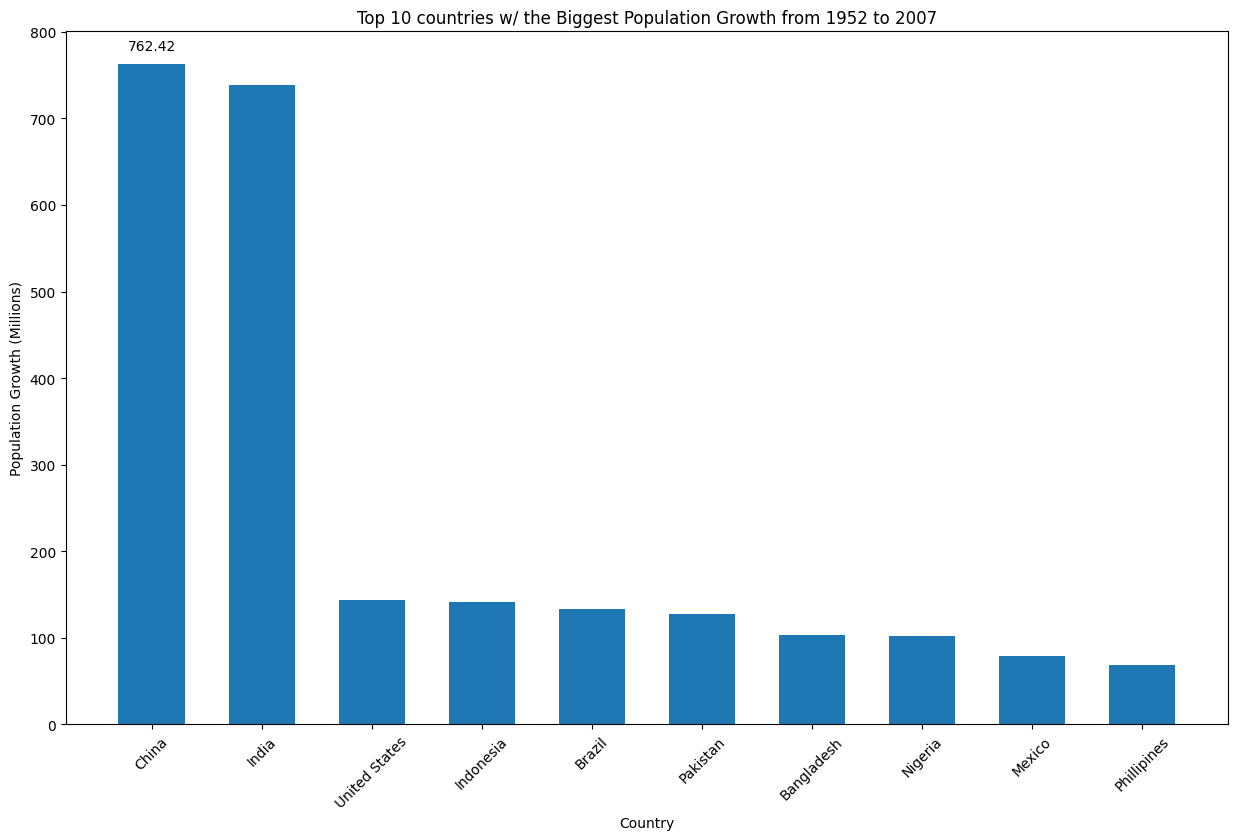

ConversionError: Failed to convert value(s) to axis units: 'India'

<Figure size 640x480 with 1 Axes>

ConversionError: Failed to convert value(s) to axis units: 'United States'

<Figure size 640x480 with 1 Axes>

ConversionError: Failed to convert value(s) to axis units: 'Indonesia'

<Figure size 640x480 with 1 Axes>

ConversionError: Failed to convert value(s) to axis units: 'Brazil'

<Figure size 640x480 with 1 Axes>

ConversionError: Failed to convert value(s) to axis units: 'Pakistan'

<Figure size 640x480 with 1 Axes>

ConversionError: Failed to convert value(s) to axis units: 'Bangladesh'

<Figure size 640x480 with 1 Axes>

ConversionError: Failed to convert value(s) to axis units: 'Nigeria'

<Figure size 640x480 with 1 Axes>

ConversionError: Failed to convert value(s) to axis units: 'Mexico'

<Figure size 640x480 with 1 Axes>

ConversionError: Failed to convert value(s) to axis units: 'Phillipines'

<Figure size 640x480 with 1 Axes>

In [17]:
## Now lets plot our data!
names = ['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Bangladesh', 'Nigeria', 'Mexico', 'Phillipines']
pop_grow = (c_merge['population_growth'] / 10**6)

plt.figure(figsize=(15,9))
plt.bar(names,pop_grow, width=0.6)
plt.title('Top 10 countries w/ the Biggest Population Growth from 1952 to 2007')
plt.xlabel('Country')
plt.ylabel('Population Growth (Millions)')
plt.xticks(rotation=45)

# zip joins x and y coordinates in pairs
for x, y in zip(names, pop_grow):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                (x,y),  # this is the point to label
                textcoords="offset points", # how to position the text
                xytext=(0,10), #distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
    plt.show()